In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Data Cleaning 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
df.duplicated().sum()

313

In [6]:
df = df.drop_duplicates()

In [7]:
df = df.drop(columns='ID')
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


### Convert Levy to int

In [8]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [9]:
df['Levy'] = df['Levy'].apply(lambda x: 0 if x == '-' else x).astype(int)

### Prod. year can be convert to vehicle age. Vehicle age is a better feature i think 

In [10]:
df['Prod. year'].describe()

count    18924.000000
mean      2010.914236
std          5.665749
min       1939.000000
25%       2009.000000
50%       2012.000000
75%       2015.000000
max       2020.000000
Name: Prod. year, dtype: float64

In [11]:
df['Vehicle_age'] = df['Prod. year'].apply(lambda x:2022 - x)

In [12]:
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Vehicle_age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,11
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,16


In [13]:
df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [14]:
df['Category'].value_counts()

Category
Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64

** Category looks good ** 

### Leather interior looks good. Just need to convert yes/no to binary

In [15]:
df['Leather interior'].value_counts()

Leather interior
Yes    13731
No      5193
Name: count, dtype: int64

In [16]:
df['Leather interior'].info()

<class 'pandas.core.series.Series'>
Index: 18924 entries, 0 to 19236
Series name: Leather interior
Non-Null Count  Dtype 
--------------  ----- 
18924 non-null  object
dtypes: object(1)
memory usage: 295.7+ KB


In [17]:
df['Leather interior'] = df['Leather interior'].replace({'Yes':1, 'No':0})

In [18]:
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Vehicle_age
0,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,11
2,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,16


In [19]:
df['Fuel type'].value_counts()

Fuel type
Petrol            9944
Diesel            4001
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: count, dtype: int64

In [20]:
df['Engine volume'].value_counts()

Engine volume
2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

In [21]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

### Let's make a new feature for Turbo

In [22]:
turbos = df['Engine volume'].str.split().apply(lambda x: 1 if len(x) == 2 else 0)

In [23]:
df['Turbo'] = turbos

In [24]:
df['Engine volume'] = df['Engine volume'].str.split().apply(lambda x: x[0])

In [25]:
df['Engine volume'] = df['Engine volume'].astype(float)

### Mileage

In [26]:
df = df.rename(columns={'Mileage': 'Mileage_(km)'})

In [27]:
df['Mileage_(km)'] = df['Mileage_(km)'].str.replace('km', '').astype(float)

In [28]:
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage_(km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Vehicle_age,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,12,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,11,0
2,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,16,0


### Cylinders

In [29]:
df['Cylinders'].describe()

count    18924.000000
mean         4.580216
std          1.200223
min          1.000000
25%          4.000000
50%          4.000000
75%          4.000000
max         16.000000
Name: Cylinders, dtype: float64

*** Looks like there is outliers in cylinders feature ***

### Gearbox

In [30]:
df['Gear box type'].value_counts()

Gear box type
Automatic    13282
Tiptronic     3065
Manual        1844
Variator       733
Name: count, dtype: int64

### Drivewheel

In [31]:
df['Drive wheels'].value_counts()

Drive wheels
Front    12695
4x4       3969
Rear      2260
Name: count, dtype: int64

### Doors

In [32]:
df['Doors'] = df['Doors'].str.split('-').apply(lambda x: x[0])

In [33]:
df['Doors'].unique()

array(['04', '02', '>5'], dtype=object)

In [34]:
df['Doors'].value_counts()

Doors
04    18032
02      768
>5      124
Name: count, dtype: int64

In [35]:
df = df.drop(columns=['Doors','Wheel','Color'])

In [36]:
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage_(km),Cylinders,Gear box type,Drive wheels,Airbags,Vehicle_age,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,4x4,12,12,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,8,11,0
2,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,Front,2,16,0


In [37]:
df.describe()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage_(km),Cylinders,Airbags,Vehicle_age,Turbo
count,1.892400e+04,18924.000000,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,632.886493,2010.914236,0.725587,2.306251,1.555373e+06,4.580216,6.568379,11.085764,0.099979
std,1.921356e+05,568.273736,5.665749,0.446230,0.877591,4.880221e+07,1.200223,4.322323,5.665749,0.299980
min,1.000000e+00,0.000000,1939.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,2.000000,0.000000
25%,5.331000e+03,0.000000,2009.000000,0.000000,1.800000,7.019575e+04,4.000000,4.000000,7.000000,0.000000
50%,1.317200e+04,642.000000,2012.000000,1.000000,2.000000,1.264000e+05,4.000000,6.000000,10.000000,0.000000
75%,2.206300e+04,917.000000,2015.000000,1.000000,2.500000,1.891198e+05,4.000000,12.000000,13.000000,0.000000
max,2.630750e+07,11714.000000,2020.000000,1.000000,20.000000,2.147484e+09,16.000000,16.000000,83.000000,1.000000


# Look for Outliers

In [38]:
def outliers(Series):
    std = Series.std()
    mean = Series.mean()
    return (Series < (mean - std * 3)) | (Series > (mean + std * 3))
    

In [39]:
outliers_list = pd.DataFrame(columns=df.columns)
for column in df.columns:
    if df[column].dtypes == 'O':
        continue
    else:
        outliers_list=pd.concat([outliers_list, df[outliers(df[column])]])

In [40]:
dataset = df.drop(outliers_list.index)

In [41]:
dataset.describe()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage_(km),Cylinders,Airbags,Vehicle_age,Turbo
count,16535.000000,16535.000000,16535.000000,16535.000000,16535.000000,1.653500e+04,16535.000000,16535.000000,16535.000000,16535.0
mean,15948.221832,646.161778,2011.333958,0.742244,2.256994,1.615142e+05,4.494285,6.470154,10.666042,0.0
std,16010.762268,485.985921,5.001499,0.437412,0.772974,7.907343e+05,1.048457,4.297266,5.001499,0.0
min,1.000000,0.000000,1994.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,2.000000,0.0
25%,4704.000000,0.000000,2010.000000,0.000000,1.800000,7.108500e+04,4.000000,4.000000,7.000000,0.0
50%,12544.000000,697.000000,2012.000000,1.000000,2.000000,1.261160e+05,4.000000,4.000000,10.000000,0.0
75%,21181.000000,919.000000,2015.000000,1.000000,2.500000,1.876470e+05,4.000000,12.000000,12.000000,0.0
max,308906.000000,2278.000000,2020.000000,1.000000,4.800000,5.800889e+07,8.000000,16.000000,28.000000,0.0


<Axes: >

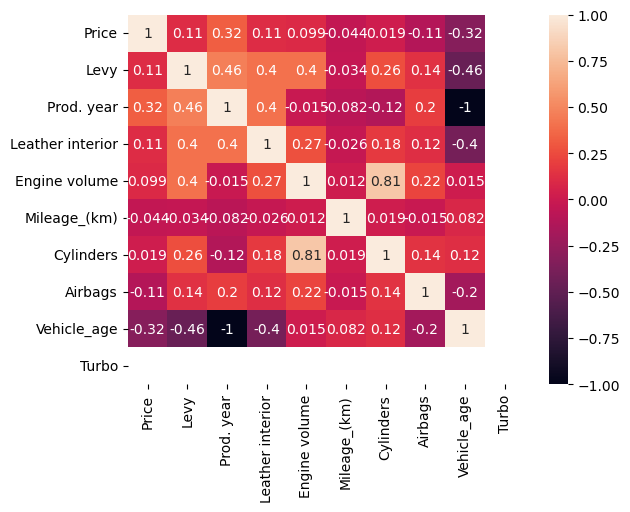

In [42]:
sns.heatmap(dataset.corr(numeric_only=True), annot=True)

* Cylinders and Engine Volume have correlation with eachother
* Cylinders and Engine have low corr with Price 
* We can probably drop Prod. Year or Vehicle Age for one or the other
* Something is wrong with Turbo

In [43]:
dataset['Turbo'].value_counts()

Turbo
0    16535
Name: count, dtype: int64

In [44]:
dataset = dataset.drop(columns=['Turbo', 'Engine volume', 'Prod. year'])

# Dummies/ OHE

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Manufacturer',
 'Model',
 'Category',
 'Fuel type',
 'Gear box type',
 'Drive wheels']

In [47]:
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(dataset[categorical_columns])

In [48]:
dataset_categorical_columns = dataset.copy()
dataset[categorical_columns] = encoded_data.astype(int)

In [49]:
dataset.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage_(km),Cylinders,Gear box type,Drive wheels,Airbags,Vehicle_age
0,13328,1399,29,919,4,1,2,186005.0,6.0,0,0,12,12
1,16621,1018,7,471,4,0,5,192000.0,6.0,2,0,8,11
2,8467,0,19,489,3,0,5,200000.0,4.0,3,1,2,16
3,3607,862,15,473,4,1,2,168966.0,4.0,0,0,0,11
4,11726,446,19,489,3,1,5,91901.0,4.0,0,1,4,8


<Axes: >

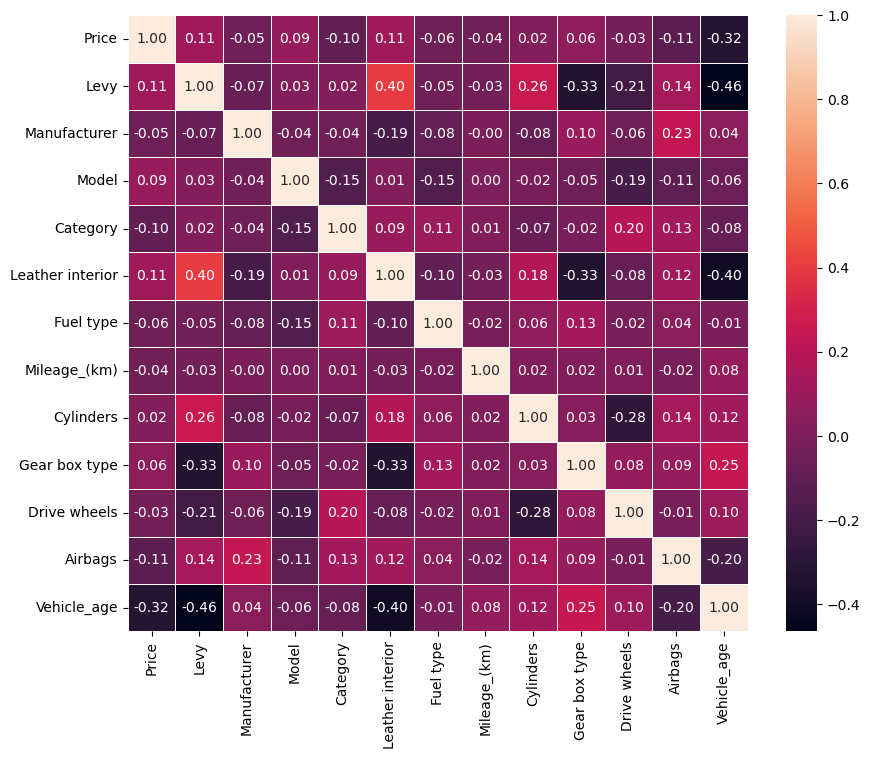

In [50]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.2f',ax=ax )

# Models

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [52]:
X = dataset.drop(columns=['Price', 'Fuel type',  'Drive wheels', 'Cylinders','Model'])
y = dataset['Price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [54]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predicted = linear_model.predict(X_test)
mean_absolute_error(y_test, linear_predicted)

10277.072218635602

In [55]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_predicted = forest_model.predict(X_test)
mean_absolute_error(y_test, forest_predicted)

4334.075923570013

In [56]:
forest_model.score(X_test,y_test)

0.6987761814350034

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor



def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params':{}
            }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.176999,{}
1,lasso,0.177007,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.510329,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,Random Forest,0.708891,{}


# Create dictionaries for price prediction

In [58]:
Manufacturer_dict = {}

In [59]:
ordinal_encoder.get_feature_names_out()

array(['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type',
       'Drive wheels'], dtype=object)

In [60]:
X_train.columns.to_list()

['Levy',
 'Manufacturer',
 'Category',
 'Leather interior',
 'Mileage_(km)',
 'Gear box type',
 'Airbags',
 'Vehicle_age']

In [61]:
def create_dictionary(names_series, ordinal_encoder_series):
    dictionary = {}
    
    if len(names_series) != len(ordinal_encoder_series):
        print('Error: Length of the 2 series are not the same')
        return
    
    for index, content in names_series.items():
        dictionary[content.upper()] =int(ordinal_encoder_series[index])
    
    return dictionary
        
manufacture_dict = create_dictionary(dataset_categorical_columns['Manufacturer'],dataset['Manufacturer'])
category_dict = create_dictionary(dataset_categorical_columns['Category'],dataset['Category'])
gear_box_dict = create_dictionary(dataset_categorical_columns['Gear box type'],dataset['Gear box type'])
model_dict = create_dictionary(dataset_categorical_columns['Model'],dataset['Model'])

In [62]:
X_train.columns

Index(['Levy', 'Manufacturer', 'Category', 'Leather interior', 'Mileage_(km)',
       'Gear box type', 'Airbags', 'Vehicle_age'],
      dtype='object')

In [71]:
def predict_car_price(levy, manufacturer, category, 
                      leather_interior, mileage, 
                      gear_box_type, airbags,
                      age):
    manufacturer = manufacturer.upper()
    category = category.upper()
    gear_box_type = gear_box_type.upper()
    
    return forest_model.predict([[levy, manufacture_dict[manufacturer],
                                category_dict[category],
                                leather_interior, mileage,
                                gear_box_dict[gear_box_type], airbags,
                                age]])

In [72]:
dataset_categorical_columns.head(1)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage_(km),Cylinders,Gear box type,Drive wheels,Airbags,Vehicle_age
0,13328,1399,LEXUS,RX 450,Jeep,1,Hybrid,186005.0,6.0,Automatic,4x4,12,12


In [73]:
category_dict

{'JEEP': 4,
 'HATCHBACK': 3,
 'SEDAN': 9,
 'MICROBUS': 6,
 'GOODS WAGON': 2,
 'UNIVERSAL': 10,
 'COUPE': 1,
 'MINIVAN': 7,
 'CABRIOLET': 0,
 'PICKUP': 8,
 'LIMOUSINE': 5}

In [74]:
predict_car_price(1399, 'Lexus', 'jEEp', 1,  186005, 'automatic',  12, 12)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([13314.71110356])

# Export

In [78]:
import pickle
with open('used_car_prices_model.pickle','wb') as f:
    pickle.dump(forest_model, f)

In [79]:
import json
with open('Manufacturer_dict.json', 'w') as f:
    json.dump(manufacture_dict, f)

In [80]:
with open('category_dict.json', 'w') as f:
    json.dump(category_dict, f)
with open('gear_box_dict.json', 'w') as f:
    json.dump(gear_box_dict, f)  